Implement a support vector machine (SVM) to classify images of cats and dogs 

Dogs vs. Cats

In [50]:
import os
import shutil

# Create the .kaggle directory
kaggle_dir = os.path.expanduser('~/.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)

# Copy kaggle.json to the .kaggle directory
shutil.copy('kaggle.json', kaggle_dir)

# Set permissions (if needed)
# Note: File permissions in Windows are managed differently and may not need adjustment.


'C:\\Users\\DANISH/.kaggle\\kaggle.json'

In [1]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25003


In [4]:
file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

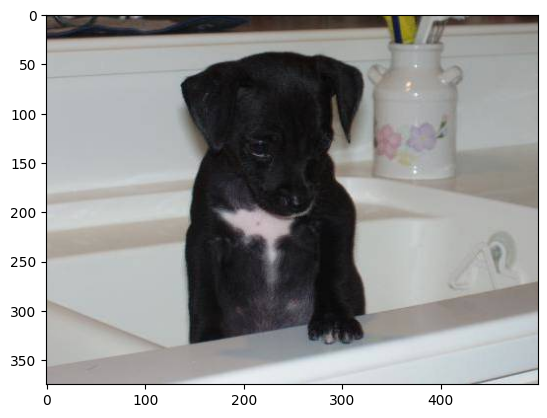

In [7]:
# display dog image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
img = mpimg.imread('train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

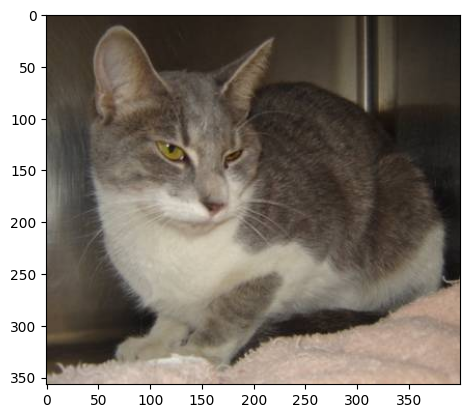

In [8]:
# display cat image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [9]:
import os
file_names = os.listdir('train')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])


cat
cat
cat
cat
cat


In [10]:
import os
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12503
Number of cat images = 12500


In [11]:
import os

# Creating a directory for resized images if it doesn't exist
os.makedirs('image resized', exist_ok=True)


In [12]:
from PIL import Image
import os

original_folder = 'train'
resized_folder = 'image_resized'

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)  # Corrected path concatenation

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    new_img_path = os.path.join(resized_folder, filename)  # Corrected path concatenation
    img.save(new_img_path)


In [13]:
import os
print(os.listdir('image resized'))

[]


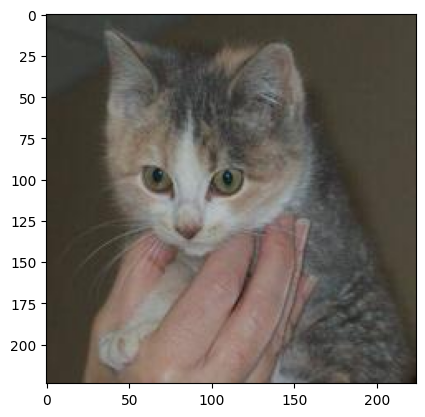

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('image_resized/cat.10002.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
# creaing a for loop to assign labels
filenames = os.listdir('image_resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [16]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
2001


In [17]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [18]:
# counting the images of dogs and cats out of 2000 images
import numpy as np
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0]
[2000]


Converting all the resized images to numpy arrays

In [19]:
import cv2
import glob

In [20]:
image_directory = 'image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [21]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [22]:
type(dog_cat_images)

numpy.ndarray

In [23]:
print(dog_cat_images.shape)

(2001, 224, 224, 3)


In [24]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [25]:
print("Shape of X:", X.shape)  # or len(X) if X is a list
print("Shape of Y:", Y.shape)  # or len(Y) if Y is a list


Shape of X: (2001, 224, 224, 3)
Shape of Y: (2000,)


In [26]:
from sklearn.model_selection import train_test_split

# Assuming X and Y have inconsistent lengths
min_samples = min(len(X), len(Y))
X_train, X_test, Y_train, Y_test = train_test_split(X[:min_samples], Y[:min_samples], test_size=0.2, random_state=2)


In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2001, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [28]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
print(X_train_scaled)

[[[[0.43529412 0.4627451  0.49803922]
   [0.43137255 0.45882353 0.49411765]
   [0.4627451  0.48235294 0.51764706]
   ...
   [0.97647059 0.98431373 0.98431373]
   [0.98823529 0.99215686 0.98431373]
   [0.98823529 0.99215686 0.97647059]]

  [[0.22745098 0.25490196 0.29019608]
   [0.22352941 0.25098039 0.28627451]
   [0.25490196 0.2745098  0.30980392]
   ...
   [0.98039216 0.98823529 0.98823529]
   [0.99215686 0.99607843 0.98823529]
   [0.99215686 0.99607843 0.98039216]]

  [[0.21568627 0.23529412 0.27058824]
   [0.21176471 0.23137255 0.26666667]
   [0.24705882 0.25490196 0.29411765]
   ...
   [0.98431373 0.99215686 0.99215686]
   [0.99607843 1.         0.99215686]
   [1.         1.         0.98823529]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [1.         0.99607843 1.        ]
   [1.         0.99607843 1.        ]]

  [[0.99215686 0.99215686 0.99215686]
   [0.9

Building the Neural Network

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [34]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [36]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5



50/50 [==============================] - 43s 648ms/step - loss: 0.0622 - acc: 0.9706
Epoch 2/5
50/50 [==============================] - 33s 654ms/step - loss: 3.1439e-04 - acc: 1.0000
Epoch 3/5
50/50 [==============================] - 32s 640ms/step - loss: 2.8135e-04 - acc: 1.0000
Epoch 4/5
50/50 [==============================] - 30s 607ms/step - loss: 2.5345e-04 - acc: 1.0000
Epoch 5/5
50/50 [==============================] - 31s 618ms/step - loss: 2.2737e-04 - acc: 1.0000


In [37]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 11s 654ms/step - loss: 1.8096e-04 - acc: 1.0000
Test Loss = 0.00018096021085511893
Test Accuracy = 1.0


Predictive System

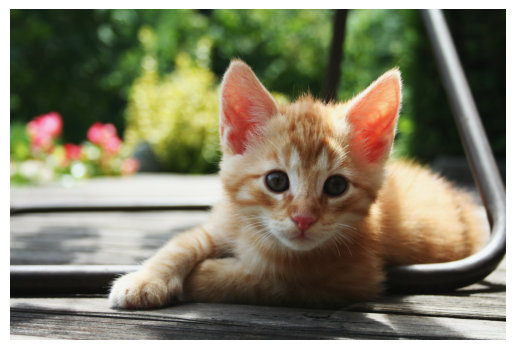

1/1 [==============================] - 0s 76ms/step
[[ 4.417516 -4.947991]]
0
The image represents a Cat


In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to display the image
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Provide the image path directly (modify this line)
input_image_path = 'cat.jpg'

# Load the image
input_image = cv2.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to load the image from '{input_image_path}'. Please check the file path.")
else:
    # Display the input image
    display_image(input_image)

    # Resize and scale the image
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255

    # Reshape the image for prediction
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Make predictions
    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)

    # Display the result
    
    print('The image represents a Cat')
    




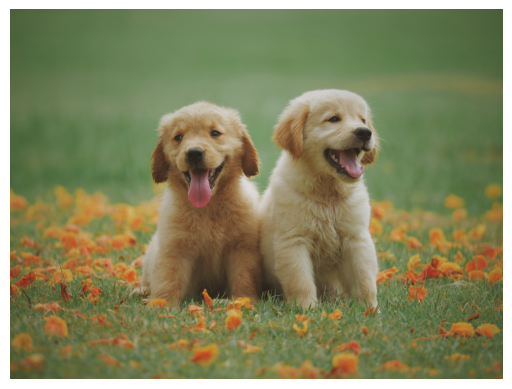

1/1 [==============================] - 0s 67ms/step
[[ 2.9076023 -4.5366726]]
0
The image represents a Dog


In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to display the image
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Provide the image path directly (modify this line)
input_image_path = 'dog.jpg'

# Load the image
input_image = cv2.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to load the image from '{input_image_path}'. Please check the file path.")
else:
    # Display the input image
    display_image(input_image)

    # Resize and scale the image
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255

    # Reshape the image for prediction
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Make predictions
    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)

    # Display the result
    
    print('The image represents a Dog')